<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/BaoCaoGiuaKy/Foods_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [ ]:
folder = '/content/drive/MyDrive/AI/Foods'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('BanhMi'):
    output = 1
  if file.startswith('BanhXeo'):
    output = 2
  if file.startswith('BunBoHue'):S
    output = 3
  if file.startswith('BunDauMamTom'):
    output = 4
  if file.startswith('BunRieu'):
    output = 5
  if file.startswith('BunThitNuong'):
    output = 6
  if file.startswith('ChaoLong'):
    output = 7
  if file.startswith('ComTam'):
    output = 8
  if file.startswith('GoiCuon'):
    output = 9
  if file.startswith('Pho'):
    output = 10

  photo = load_img(folder + '/' + file, target_size=(200, 200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI/Backup/Food_photos.npy', photos)
save('/content/drive/MyDrive/AI/Backup/Food_labels.npy', labels)

(2021, 200, 200, 3) (2021,)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Load data
photos = np.load('/content/drive/MyDrive/AI/Backup/Food_photos.npy')
labels = np.load('/content/drive/MyDrive/AI/Backup/Food_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Split data into train and test sets

test_x, test_y = photos[:25], labels[:25]
train_x, train_y = photos[25:], labels[25:]

# Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(11, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)


In [ ]:
# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=64),
                    epochs=30, validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

Epoch 1/30
32/32 [==============================] - 18s 575ms/step - loss: 0.7843 - accuracy: 0.7229 - val_loss: 0.9215 - val_accuracy: 0.5200
Epoch 2/30
32/32 [==============================] - 20s 618ms/step - loss: 0.7478 - accuracy: 0.7280 - val_loss: 0.7200 - val_accuracy: 0.6800
Epoch 3/30
32/32 [==============================] - 22s 674ms/step - loss: 0.7384 - accuracy: 0.7365 - val_loss: 0.9527 - val_accuracy: 0.6400
Epoch 4/30
32/32 [==============================] - 18s 566ms/step - loss: 0.8082 - accuracy: 0.7234 - val_loss: 1.0603 - val_accuracy: 0.5600
Epoch 5/30
32/32 [==============================] - 18s 569ms/step - loss: 0.7162 - accuracy: 0.7375 - val_loss: 1.1810 - val_accuracy: 0.4800
Epoch 6/30
32/32 [==============================] - 21s 649ms/step - loss: 0.7284 - accuracy: 0.7430 - val_loss: 0.9963 - val_accuracy: 0.5200
Epoch 7/30
32/32 [==============================] - 19s 585ms/step - loss: 0.6629 - accuracy: 0.7615 - val_loss: 0.6102 - val_accuracy: 0.8000

In [ ]:
model.save('/content/drive/MyDrive/AI/Backup/Foods.h5')

Test loss: 0.6997525691986084
Test accunacy 0.800000011920929


Text(0.5, 1.0, 'Training & Testing Accuracy')

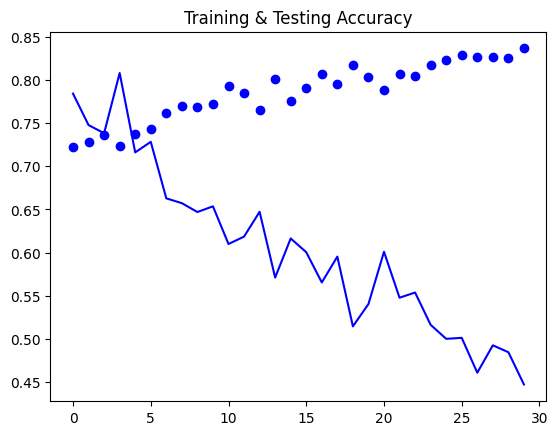

In [ ]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

1/1 [==============================] - 0s 94ms/step
Bún đậu mắm tôm


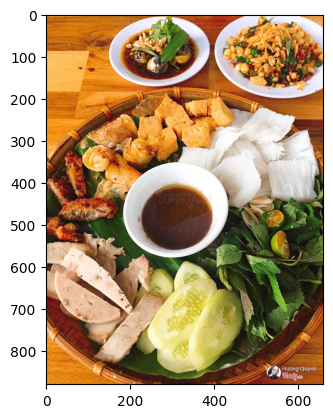

1/1 [==============================] - 0s 23ms/step
Cháo lòng


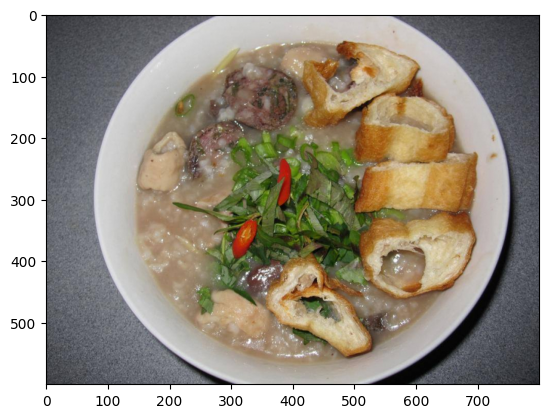

1/1 [==============================] - 0s 30ms/step
Cơm tấm


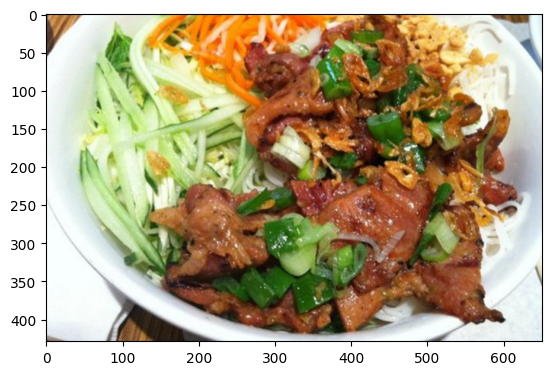

1/1 [==============================] - 0s 24ms/step
Cơm tấm


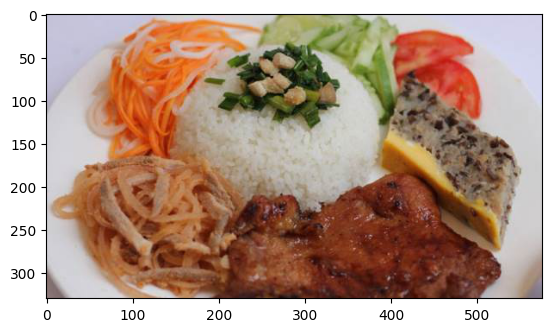

1/1 [==============================] - 0s 22ms/step
Gỏi cuốn


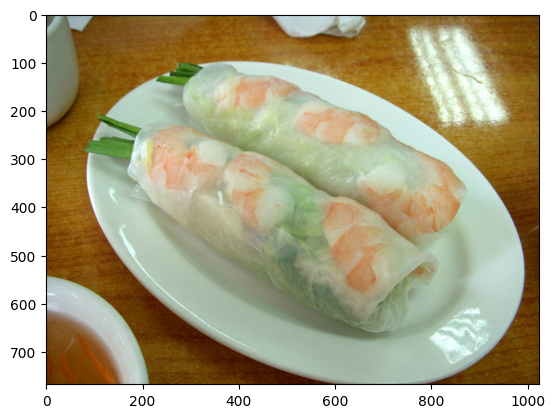

1/1 [==============================] - 0s 23ms/step
Bánh xèo


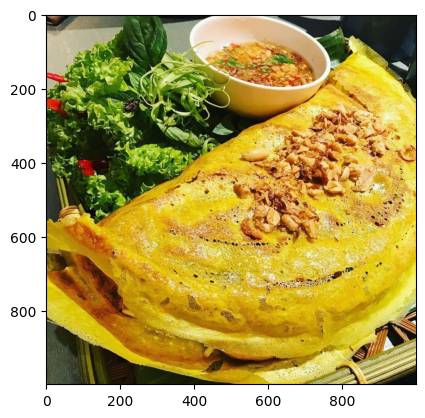

1/1 [==============================] - 0s 19ms/step
Bún bò Huế


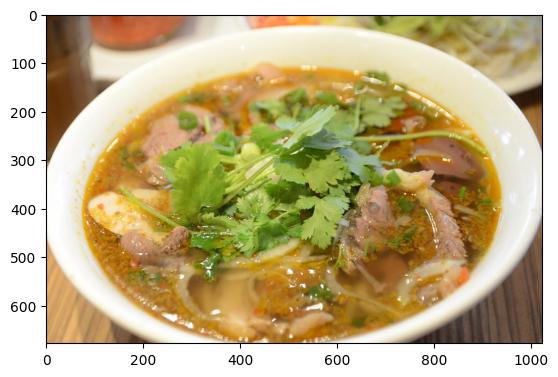

1/1 [==============================] - 0s 33ms/step
Bánh mì


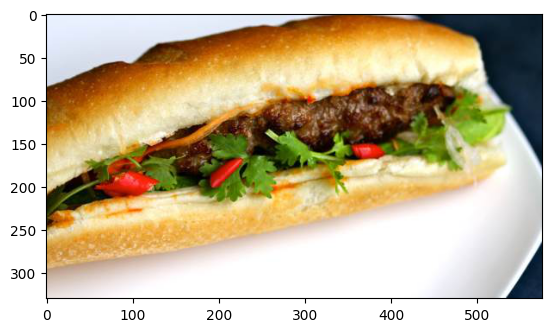

1/1 [==============================] - 0s 22ms/step
Phở


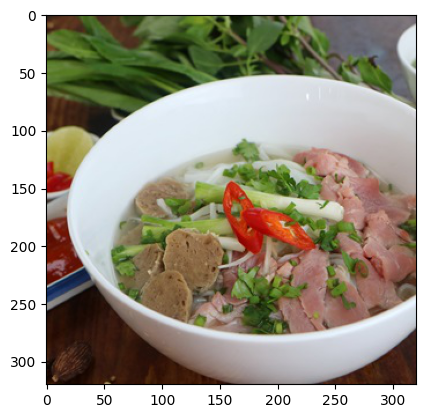

1/1 [==============================] - 0s 22ms/step
Bún riêu


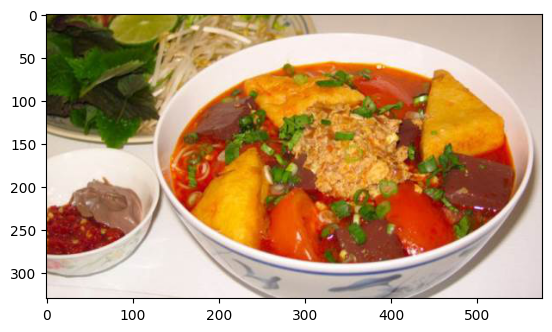

1/1 [==============================] - 0s 22ms/step
Bún thịt nướng


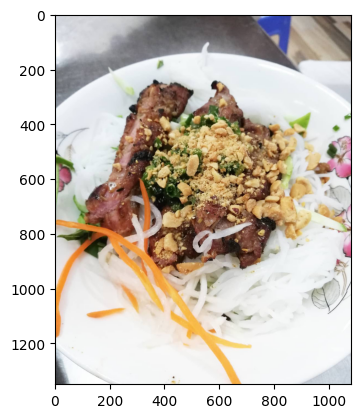

1/1 [==============================] - 0s 54ms/step
Bún bò Huế


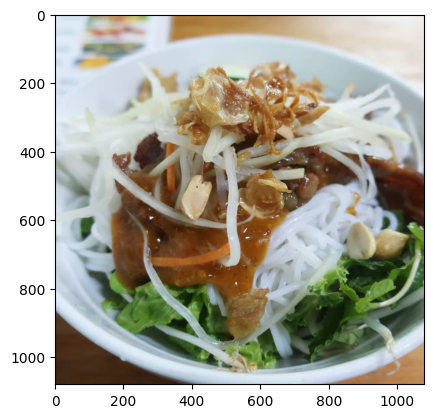

In [ ]:
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/AI/Backup/Foods.h5')
folder = '/content/drive/MyDrive/AI/FoodTest'
for file in listdir(folder):
  photos = load_img(folder + '/' +  file)
  plt.imshow(photos)
  photo = load_img(folder + '/' +  file, target_size = (200, 200))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model1.predict(photo).argmax())
  class_name=['Bánh mì', 'Bánh xèo', 'Bún bò Huế',
              'Bún đậu mắm tôm', 'Bún riêu', 'Bún thịt nướng',
              'Cháo lòng', 'Cơm tấm', 'Gỏi cuốn', 'Phở']
  print(class_name[result - 1])
  plt.show()